# Linear Regression From Scratch

## In this notebook we will derive the supervised learning algorith of linear regression from scratch using its mathematical principles

In [700]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Import and read the data

In [702]:
df = pd.read_csv("salary_data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


## Feature Engineering 

In [705]:
# set up the data
X = df["YearsExperience"].values
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [706]:
y= df["Salary"].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [707]:
X.shape

(30,)

In [708]:
y.shape

(30,)

##  Pre Normailization scatter plot 

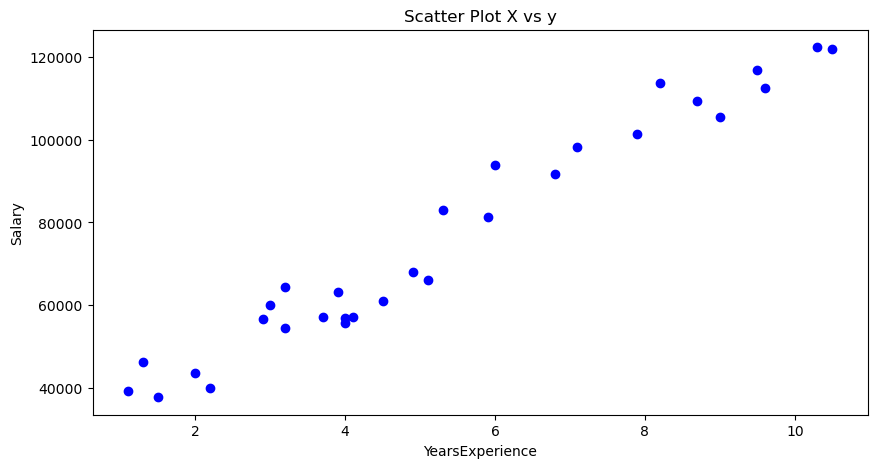

In [710]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,marker="o",color="b",label="Data points")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Scatter Plot X vs y")
plt.show()

## Normalise the data using Z-score normalization Z = (X - mu)/sigma to imporve the performance

In [712]:
# normalization
for i in range(len(X)):
    X[i] = (X[i] - np.mean(X))/(np.std(X))
    y[i] = (y[i] - np.mean(y))/(np.std(y))
print(X,y)

[-1.51005294e+00 -1.32826862e+00 -1.17144650e+00 -9.39971253e-01
 -8.14883312e-01 -5.57512991e-01 -4.79921456e-01 -3.81178737e-01
 -3.40038140e-01 -1.74274962e-01 -8.83555371e-02 -2.95629233e-02
  3.34301761e-03  5.87723420e-02  1.83594334e-01  3.08146844e-01
  3.87362727e-01  4.67424110e-01  6.40540960e-01  7.05247741e-01
  9.33875469e-01  1.06166410e+00  1.31936998e+00  1.48726460e+00
  1.73176746e+00  1.97230829e+00  2.33123131e+00  2.68889010e+00
  3.42381246e+00  4.51535811e+00] [-1.36011263 -0.96437889 -1.10414957 -0.83147861 -0.84494548 -0.32864589
 -0.177405   -0.25865315  0.02404825 -0.09097589  0.08398964 -0.03067272
  0.03253832  0.07284458  0.18950563  0.36003396  0.36247959  0.72701816
  0.74537613  1.03690968  1.06555592  1.26632616  1.42055297  1.79201803
  1.8793775   1.99391362  2.51068643  2.82038701  3.75016633  5.3851648 ]


## Post normalization scatter plot 

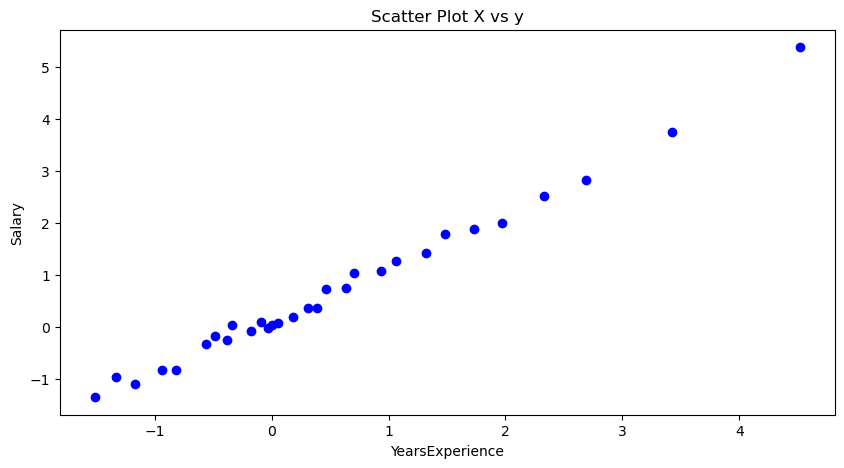

In [714]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,marker="o",color="b",label="Data points")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Scatter Plot X vs y")
plt.show()

## Prepare the data for matrix multiplicatoin

In [716]:
X = np.reshape(X,newshape=(-1,1))
y = np.reshape(y,newshape=(-1,1))
print(X.shape)
print(y.shape)




(30, 1)
(30, 1)


## Computing Cost function 

In [718]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    prediction = np.dot(X,w) + b
    cost_function = (np.sum(prediction - y)**2)/(2*m)
    return cost_function
    
    


## Computing Gradient Descent 

In [720]:
def gradient_descent(X,y,learning_rate,iteration):
    m,n = X.shape
    w = np.zeros((n,1))
    b = 0
    cost_history = []
    for _ in range(iteration):
        prediction = np.dot(X,w) +  b
        d_w = (1/m)*(np.dot(X.T,(prediction-y)))
        d_b = (1/m)*(np.sum(prediction - y))
        w -= learning_rate*d_w
        b -= learning_rate*d_b
        cost_history.append(compute_cost(X,y,w,b))

    return w,b,cost_history 

## Make Prediction


In [722]:
def predict(X,w,b):
    return np.dot(X,w) + b

## Plot cost history 

In [724]:
def plot_cost(cost_history):
    plt.figure(figsize=(20,10))
    plt.plot(range(len(cost_history)),cost_history,label="cost function")
    plt.xlabel("iteration")
    plt.ylabel("cost")
    plt.title("cost reduction over iteration")
    plt.legend()
    plt.show()

## Training the Linear Regression model

In [726]:
w,b,cost_history = gradient_descent(X,y,learning_rate=0.01,iteration=1000)
print(f"w : {w} b : {b} cost_hisotory : {cost_history[-1]}")

w : [[1.05756276]] b : 0.1393536282900109 cost_hisotory : 6.202633138397896e-08


## Predictions

In [728]:
predictions = predict(X,w,b)

## Plot data and Regression Line

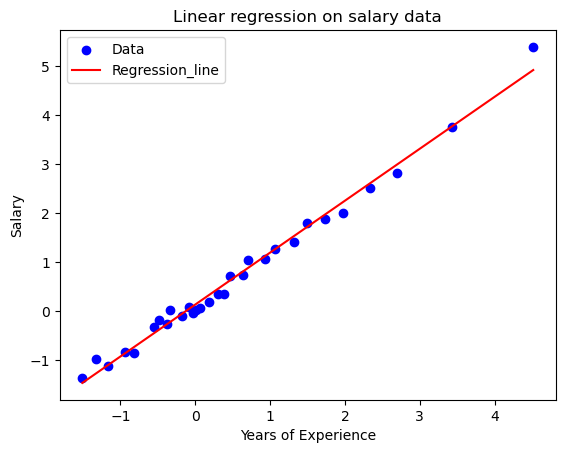

In [730]:
plt.scatter(X,y,label="Data",color = "blue")
plt.plot(X,predictions,label="Regression_line",color="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Linear regression on salary data")
plt.show()

### we can see that our line fits the data very well

## Plot cost function over iterations

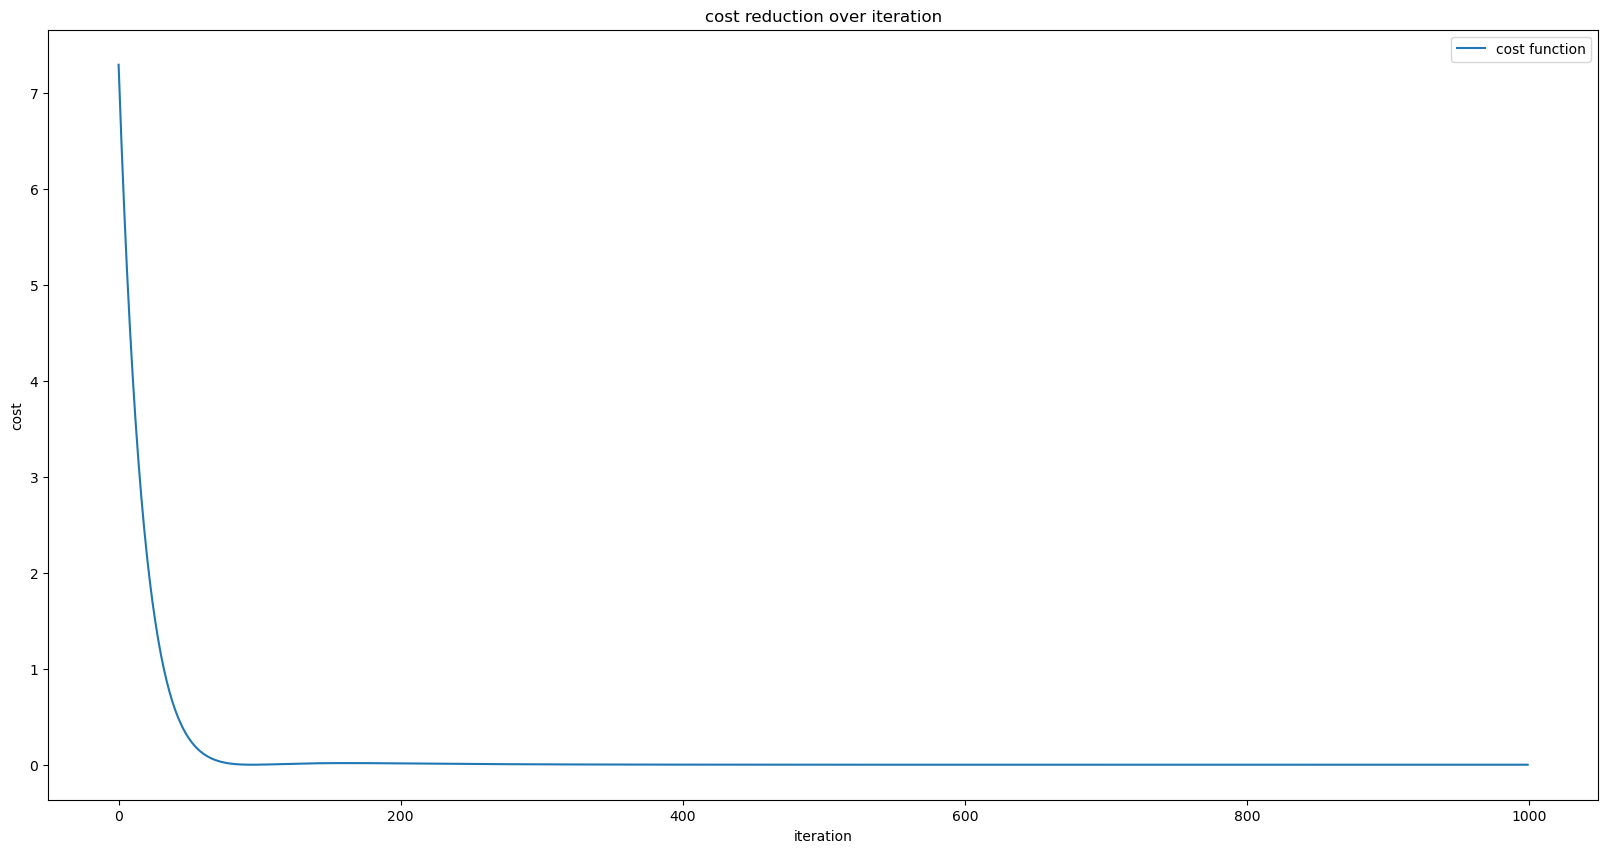

In [733]:
plot_cost(cost_history)

# Model from sklearn

In [735]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [736]:
# set up the data 
X = df["YearsExperience"].values.reshape(-1,1)
y = df["Salary"].values.reshape(-1,1)
print(X)
print(y)

[[-1.51005294e+00]
 [-1.32826862e+00]
 [-1.17144650e+00]
 [-9.39971253e-01]
 [-8.14883312e-01]
 [-5.57512991e-01]
 [-4.79921456e-01]
 [-3.81178737e-01]
 [-3.40038140e-01]
 [-1.74274962e-01]
 [-8.83555371e-02]
 [-2.95629233e-02]
 [ 3.34301761e-03]
 [ 5.87723420e-02]
 [ 1.83594334e-01]
 [ 3.08146844e-01]
 [ 3.87362727e-01]
 [ 4.67424110e-01]
 [ 6.40540960e-01]
 [ 7.05247741e-01]
 [ 9.33875469e-01]
 [ 1.06166410e+00]
 [ 1.31936998e+00]
 [ 1.48726460e+00]
 [ 1.73176746e+00]
 [ 1.97230829e+00]
 [ 2.33123131e+00]
 [ 2.68889010e+00]
 [ 3.42381246e+00]
 [ 4.51535811e+00]]
[[-1.36011263]
 [-0.96437889]
 [-1.10414957]
 [-0.83147861]
 [-0.84494548]
 [-0.32864589]
 [-0.177405  ]
 [-0.25865315]
 [ 0.02404825]
 [-0.09097589]
 [ 0.08398964]
 [-0.03067272]
 [ 0.03253832]
 [ 0.07284458]
 [ 0.18950563]
 [ 0.36003396]
 [ 0.36247959]
 [ 0.72701816]
 [ 0.74537613]
 [ 1.03690968]
 [ 1.06555592]
 [ 1.26632616]
 [ 1.42055297]
 [ 1.79201803]
 [ 1.8793775 ]
 [ 1.99391362]
 [ 2.51068643]
 [ 2.82038701]
 [ 3.7501

In [737]:
#split the test train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [738]:
# train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [739]:
#print out the line values y = wx + b
w = model.coef_
b = model.intercept_

print("w",model.coef_)
print("b",model.intercept_)

w [[1.07210033]]
b [0.16128038]


In [740]:
#use the test data to predict values to test the model
pred = model.predict(X_test)

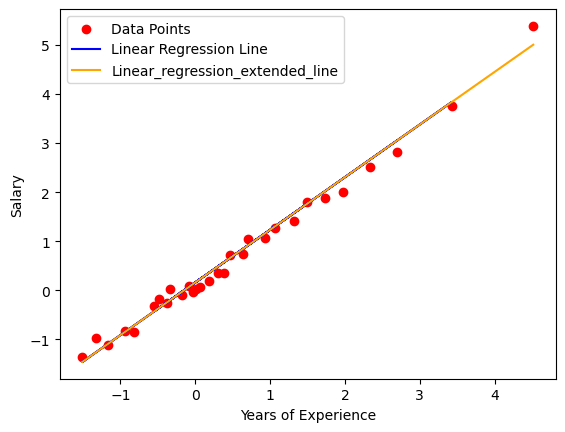

In [741]:
#plotting the regression line
plt.scatter(X,y,marker="o",color="red",label = "Data Points")
plt.plot(X_test,pred,label ="Linear Regression Line",color = "blue")
plt.plot(X,(w*X + b),label="Linear_regression_extended_line",color = "orange")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()